# Advanced Regression Assignment - Surprise Housing - Price Prediction


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1. Which variables are significant in predicting the price of a house, and

1. How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## 1. Project Setup

In [436]:
# Import relevant libraries, set appropriate configurations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Scalers
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import r2_score, mean_squared_error

# Stats for Utilities like z_score
from scipy import stats

# Sane configurations
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


In [437]:
# Read the data
df = pd.read_csv('./train.csv', na_filter = False)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


## 2. Data Exploration & EDA 

In [438]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [440]:


df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


<Axes: xlabel='FireplaceQu', ylabel='SalePrice'>

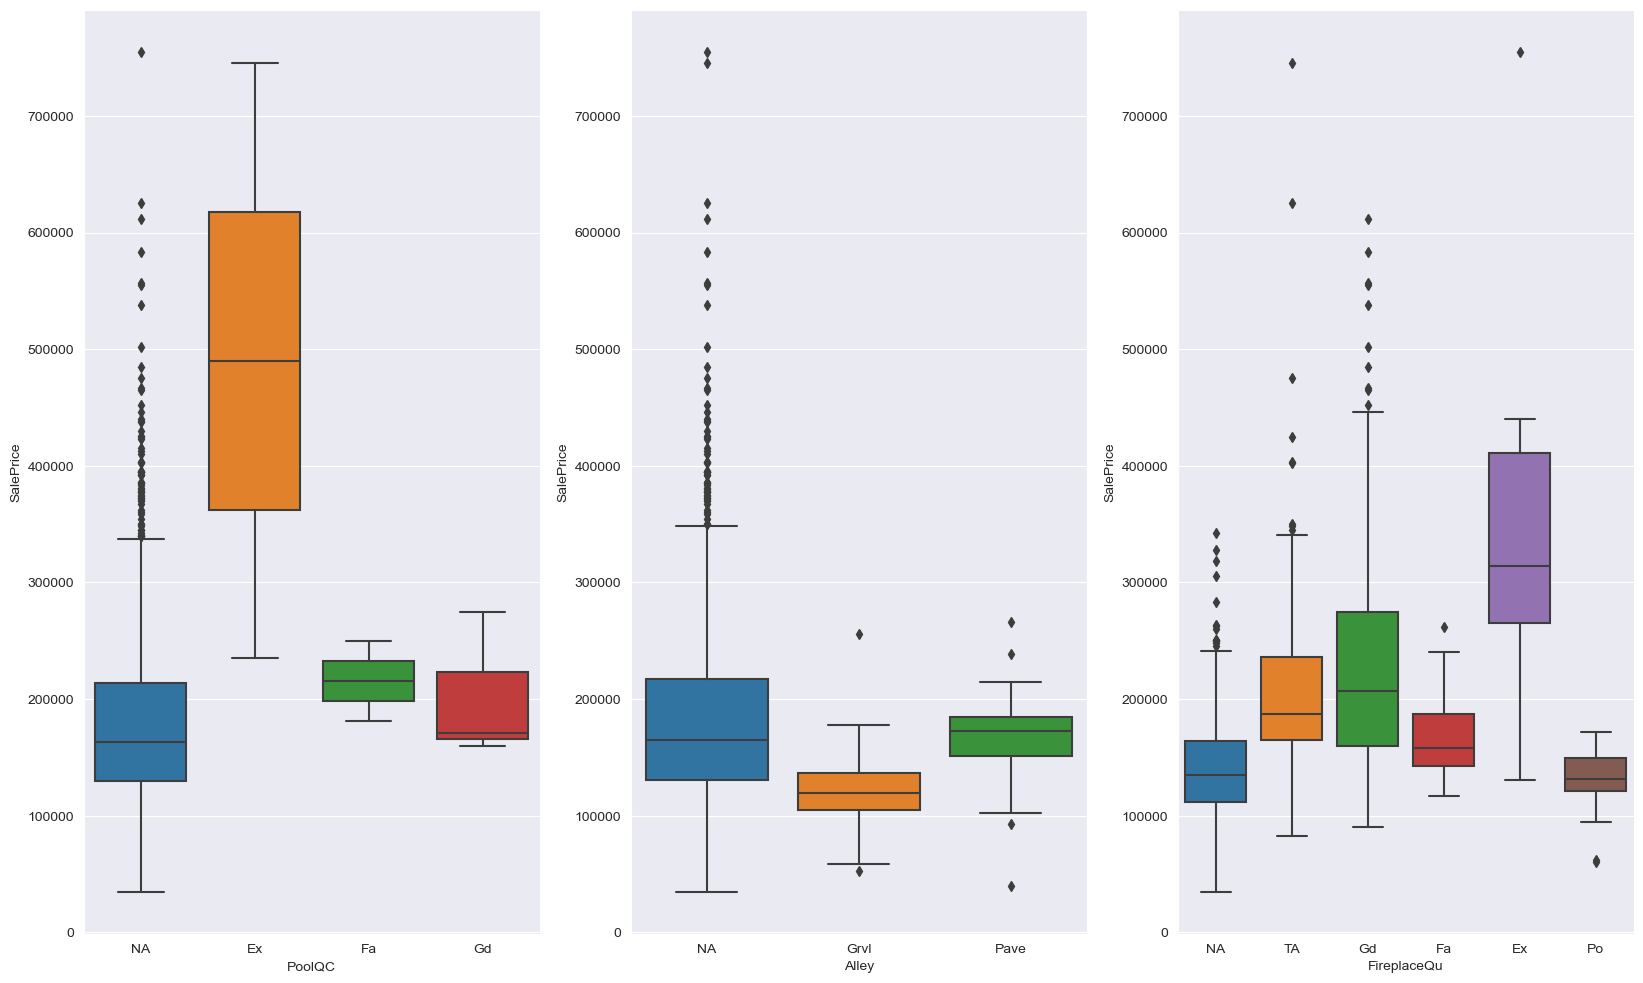

In [441]:
plt.figure(figsize=(20, 12))
plt.subplot(1,3,1)
sns.boxplot(x = 'PoolQC', y ='SalePrice', data = df)
plt.subplot(1,3,2)
sns.boxplot(x = 'Alley', y ='SalePrice', data = df)
plt.subplot(1,3,3)
sns.boxplot(x = 'FireplaceQu', y ='SalePrice', data = df)

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

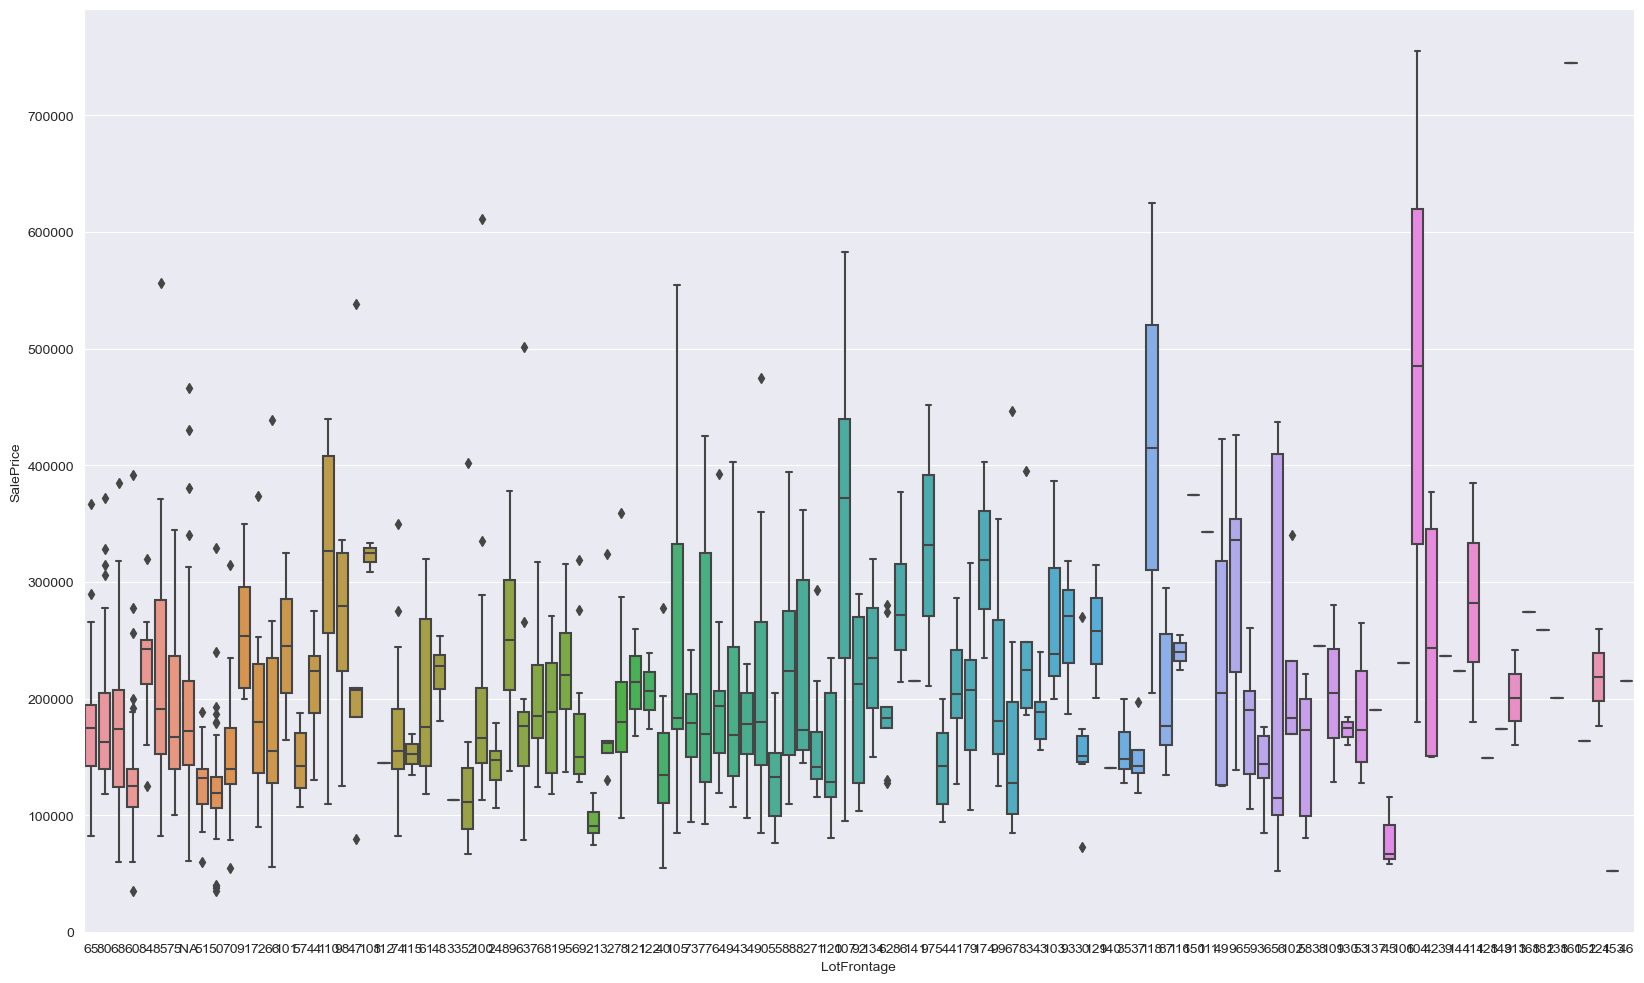

In [442]:
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'LotFrontage', y ='SalePrice', data = df)


In [443]:
# What should be the correct Type of the fields?
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      int64
OverallQual     int64
OverallCond     int64
LotFrontage    object
MasVnrArea     object
dtype: object

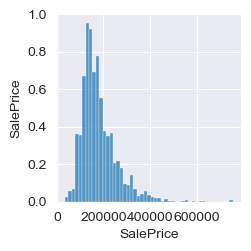

In [444]:
# Can we find any trends by plotting the numerical variables with the count?
numerical_vars=["SalePrice","LotFrontage","GarageYrBlt","MasVnrArea"]

# Create a pairplot with the numerical variables
sns.pairplot(df[numerical_vars])
plt.show()

### Data Pre-Processing

#### Handle Missing Values

In [445]:
# Let us fix 'NA' values in the LotFrontage.
# Let's replace the NA values with median value.
pd.to_numeric(df['LotFrontage'], errors='coerce').median()

69.0

In [446]:
df['LotFrontage'] = df.LotFrontage.replace('NA',70)

In [447]:
# Fixing the MasVnrArea
# Wherever there is no Masonry Veneer, let us replace the area with a zero value
df['MasVnrArea'] = df.MasVnrArea.replace('NA',0)

Now that we have replaced the values for 'NA', let us convert these two fields in to numeric types

In [448]:
## Convert two columns to 'numeric' type as mentioned above
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [449]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [450]:
df[['MasVnrArea', 'LotFrontage']].dtypes

MasVnrArea     int64
LotFrontage    int64
dtype: object

In [451]:
df[['LotFrontage','MasVnrArea']].describe()

,LotFrontage,MasVnrArea
count,1460.000000,1460.000000
mean,70.041096,103.117123
std,22.024031,180.731373
min,21.000000,0.000000
25%,60.000000,0.000000
50%,70.000000,0.000000
75%,79.000000,164.250000
max,313.000000,1600.000000


##### Now let us look at what to do with the GarageYrBlt field

In [452]:
df[['GarageYrBlt']].describe()

,GarageYrBlt
count,1460
unique,98
top,NA
freq,81


In [453]:
# GaragYrBlt is another field that has NA values.  These are because if the house does not have a garage, then the value will be NA.
# But if we want to conver this in to a numeric field, we need to fill some value.  So those cases of NA, we are going to fill with
# median value of GarageYrBlt


pd.to_numeric(df['GarageYrBlt'], errors='coerce').median()

1980.0

In [454]:
# Median Value of GarageYrBlt (ignoring the existing NA values) is 1980.  So we replace the NA values with 1980
df['GarageYrBlt'] = df.GarageYrBlt.replace('NA',1980)

In [455]:
df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea
count,1460.000000,1460.000000
mean,70.041096,103.117123
std,22.024031,180.731373
min,21.000000,0.000000
25%,60.000000,0.000000
50%,70.000000,0.000000
75%,79.000000,164.250000
max,313.000000,1600.000000


In [456]:
df['GarageYrBlt'] = pd.to_numeric(df['GarageYrBlt'], errors='coerce')

In [457]:
df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64

In [458]:
# There seems to be one value with NA.  Let us replace it with the most occuring value : SBrkr
df['Electrical'] = df.Electrical.replace('NA','SBrkr')

In [459]:
df.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<Axes: xlabel='GarageYrBlt', ylabel='Density'>

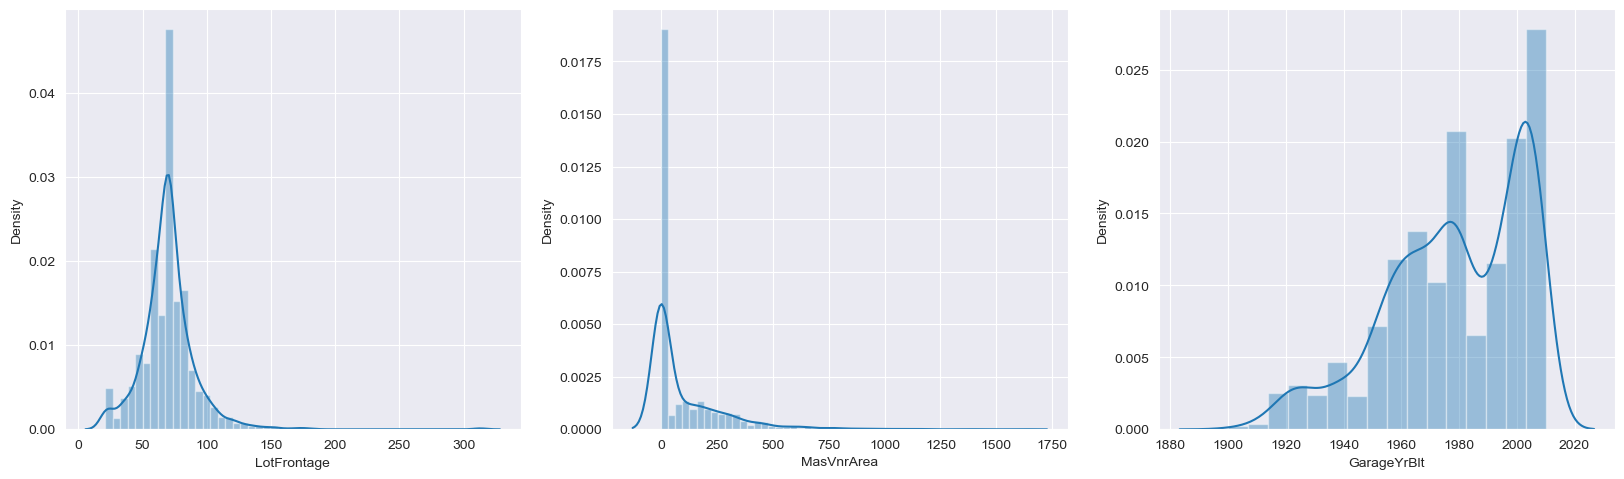

In [460]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(df['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(df['GarageYrBlt'])

In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   int64 
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

In [462]:
# Find the top 10 columns that have missing values.
percent_missing = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
percent_missing.head(10)

Id              0.0
CentralAir      0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
dtype: float64

In [463]:
# Looks like there are no missing values.  So we have put appropriate values everywhere.

In [464]:
df.nunique().sort_values()

CentralAir          2
Street              2
Utilities           2
HalfBath            3
PavedDrive          3
Alley               3
BsmtHalfBath        3
LandSlope           3
PoolQC              4
BsmtFullBath        4
FullBath            4
KitchenAbvGr        4
ExterQual           4
LandContour         4
LotShape            4
Fireplaces          4
GarageFinish        4
KitchenQual         4
ExterCond           5
MiscFeature         5
Electrical          5
YrSold              5
GarageCars          5
BsmtExposure        5
BsmtCond            5
BsmtQual            5
HeatingQC           5
Fence               5
MasVnrType          5
LotConfig           5
MSZoning            5
BldgType            5
SaleCondition       6
Foundation          6
GarageQual          6
RoofStyle           6
FireplaceQu         6
GarageCond          6
Heating             6
Functional          7
GarageType          7
BsmtFinType2        7
BsmtFinType1        7
PoolArea            8
BedroomAbvGr        8
Condition2

In [465]:
## Check for missing values
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

There appears to be two strategies taken by people for the missing values

1. If the value is missing because of Unavailability of that item (e.g. garage, basement etc.), for categorical variables, then just set them as 'NA'.  This also means their dtype should remain as object.  If they are of type numeric, they have to change to object type.
2. In case of numerical variables, most of the 'value missing' cases are because the corresponding categorical variable has unavailability for that element (e.g. MasVnrArea is NA whenever the house does not have masonry veneer, GarageYrBlt is NA whenever the house does not have garage)


In [466]:
# Replace Numbers with Text for Categorical Variables
# Helps in creating dummy variables with relevant names
df['MSSubClass']=df['MSSubClass'].replace({
        20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
        120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
        150:'1-1/2 STORY PUD - ALL AGES',
        160:'2-STORY PUD - 1946 & NEWER',
        180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
        190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

df['OverallQual']=df['OverallQual'].replace({ 
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor'})
df['OverallCond']=df['OverallCond'].replace({ 
        10:'Very Excellent',
        9:'Excellent',
        8:'Very Good',
        7:'Good',
        6:'Above Average',
        5:'Average',
        4:'Below Average',
        3:'Fair',
        2:'Poor',
        1:'Very Poor'})

### Analysis of Target Variable

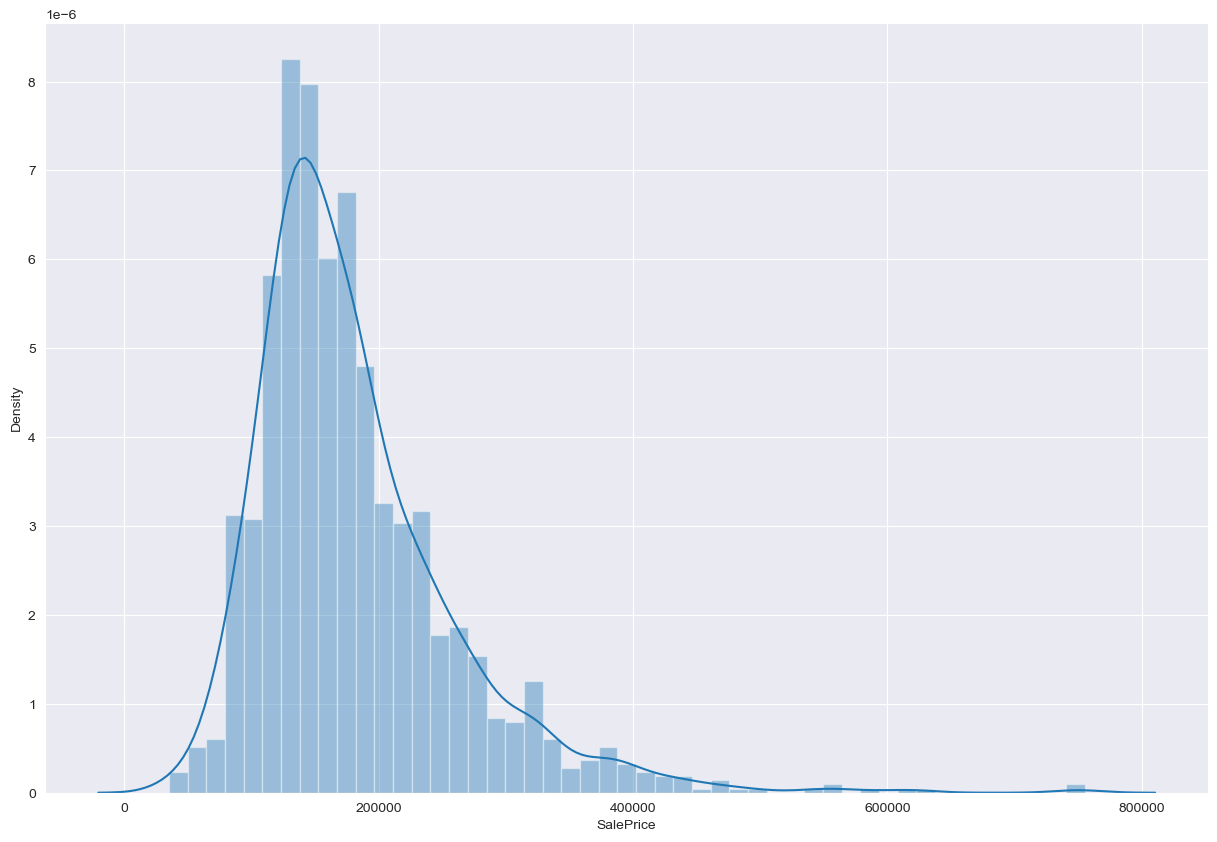

In [467]:
# Let's have a look at the target variable
plt.figure(figsize=[15,10])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [468]:
df['SalePrice'].skew()

1.8828757597682129

**Observation**
  
With a skew value of 1.88, and a graph that has a long tail to the right.  Looks like the target variable is right skewed
  
  


In [469]:
# The adjustment to be done here is to log transform the target variable 
df['SalePrice'] = np.log(df['SalePrice'])

In [470]:
# Has the skew changed?
df['SalePrice'].skew()

0.12133506220520406

**Note**
  
This has fixed the skew.  We can also look at the plot of the sale price
  
  


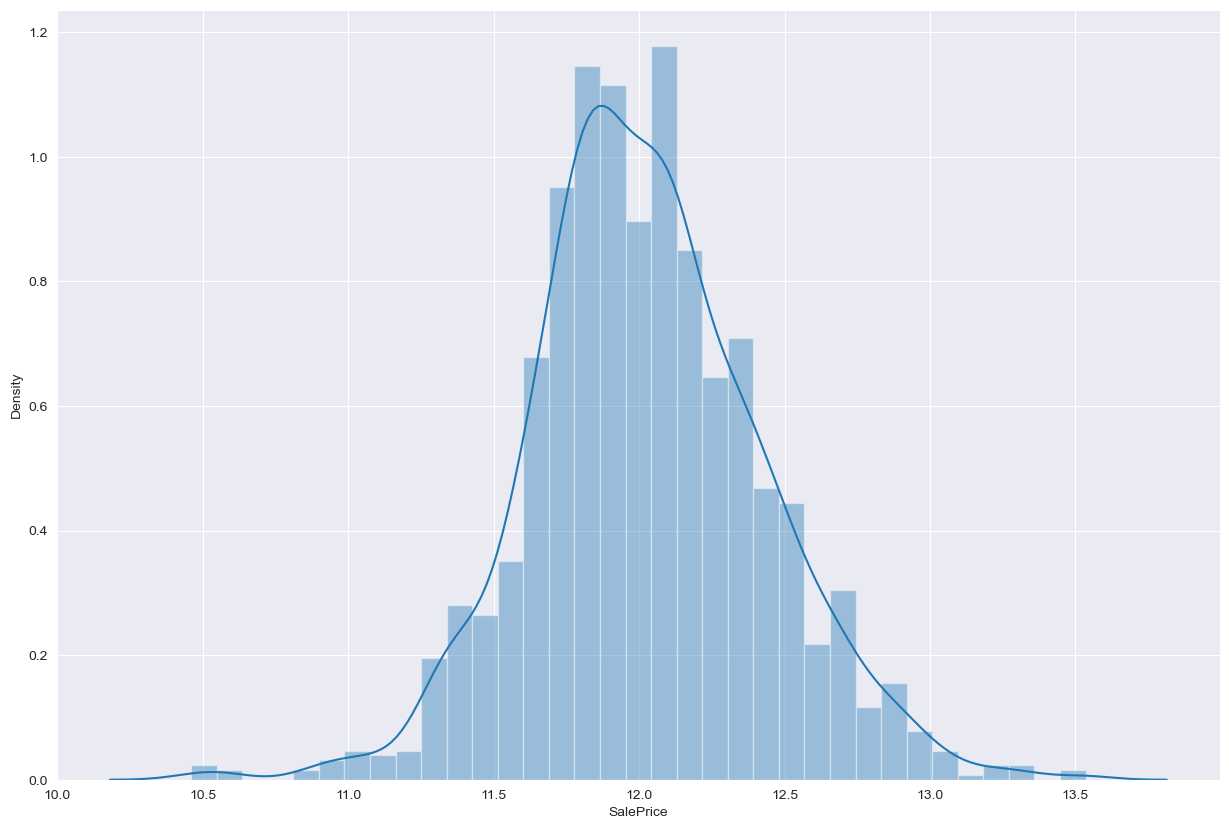

In [471]:
# Let's have a look at the target variable, again
plt.figure(figsize=[15,10])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice']);

In [472]:
# Seems to have been fixed now.

### Exploratory Data Analysis

In [473]:
categorical_variables = df.select_dtypes(include=['object'])
categorical_variables.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

### Univariate Analysis

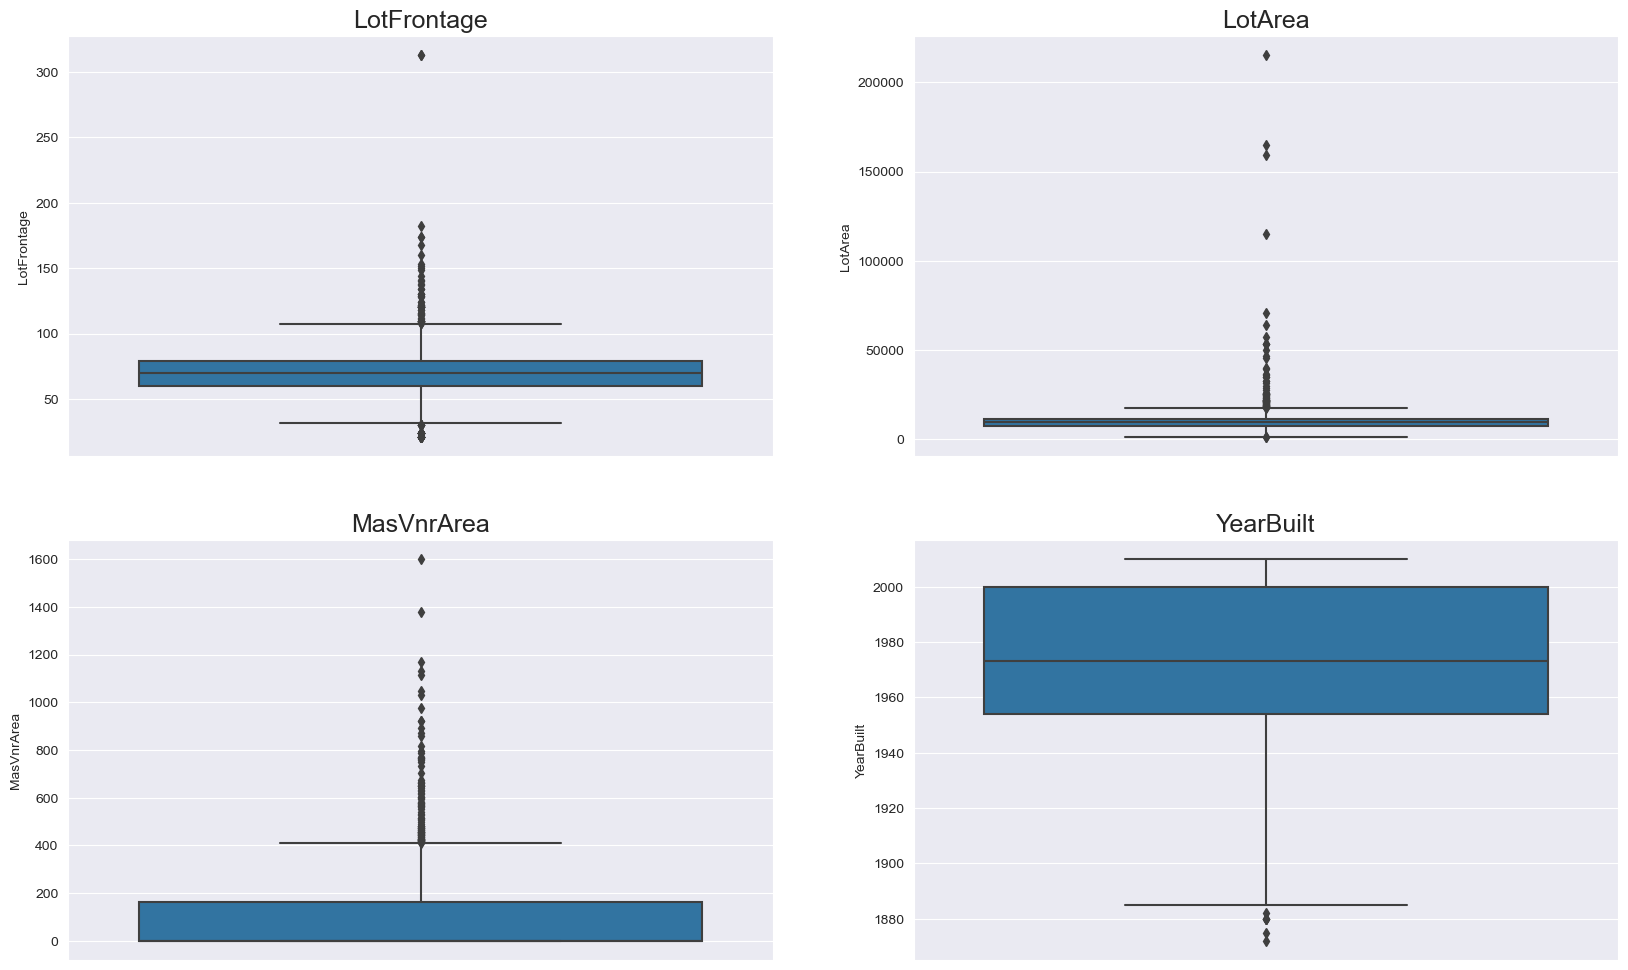

In [474]:
# Let us plot some of the numeric attributes and see if there are any patterns
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(y='LotFrontage', data=df)
plt.title('LotFrontage', fontdict={'fontsize': 18})

plt.subplot(2,2,2)
sns.boxplot(y='LotArea', data=df)
plt.title('LotArea', fontdict={'fontsize': 18})

plt.subplot(2,2,3)
sns.boxplot(y='MasVnrArea', data=df)
plt.title('MasVnrArea', fontdict={'fontsize': 18})

plt.subplot(2,2,4)
sns.boxplot(y='YearBuilt', data=df)
plt.title('YearBuilt', fontdict={'fontsize': 18})


plt.show()

**Note**   
     
📍 A lot of attributes have outliers.  We will need to do outlier treatment later

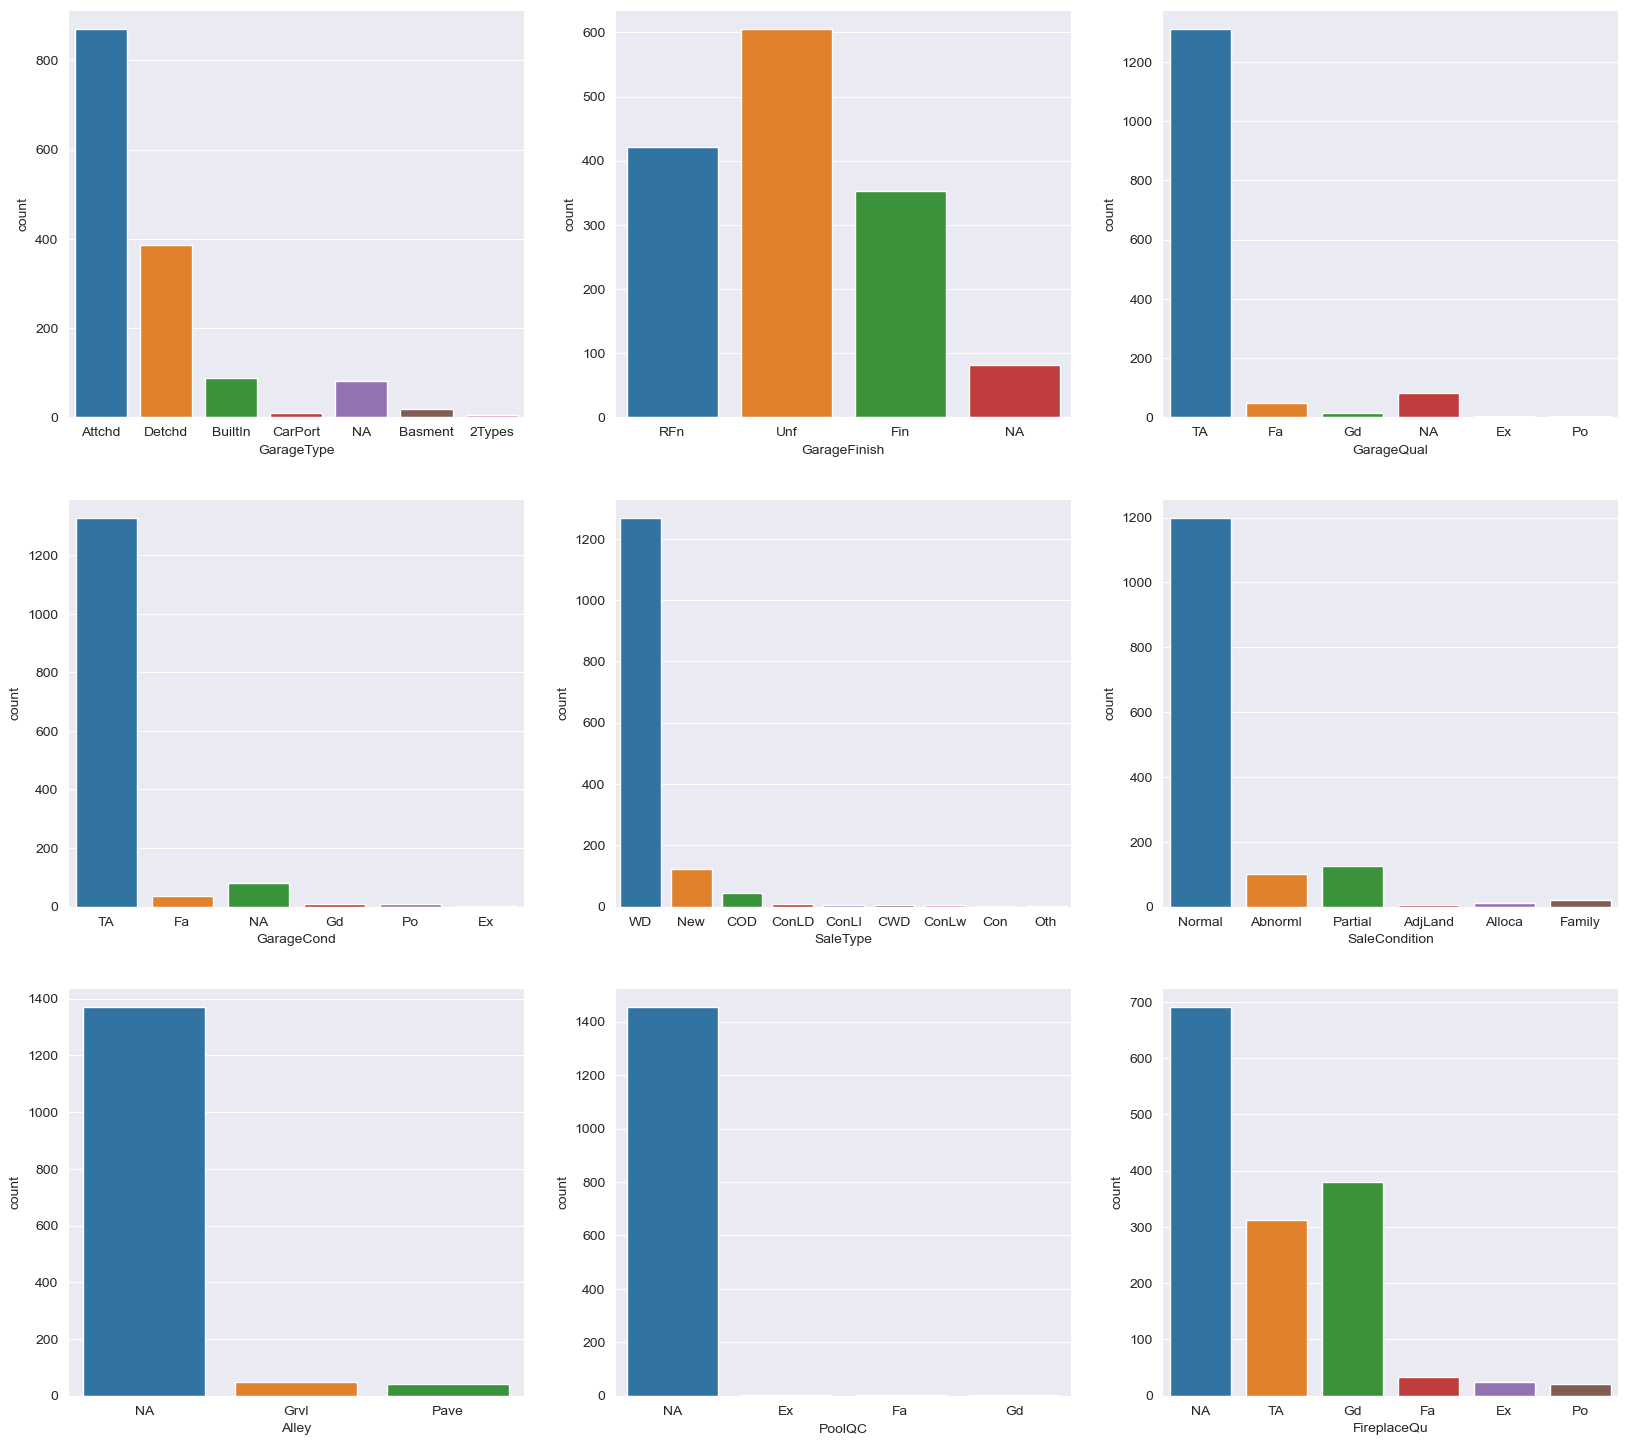

In [475]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.countplot(x = 'GarageType',  data = df)
plt.subplot(3,3,2)
sns.countplot(x = 'GarageFinish', data = df)
plt.subplot(3,3,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(3,3,4)
sns.countplot(x = 'GarageCond', data = df)
plt.subplot(3,3,5)
sns.countplot(x = 'SaleType',  data = df)
plt.subplot(3,3,6)
sns.countplot(x = 'SaleCondition', data = df)
plt.subplot(3,3,7)
sns.countplot(x = 'Alley', data = df)
plt.subplot(3,3,8)
sns.countplot(x = 'PoolQC', data = df)
plt.subplot(3,3,9)
sns.countplot(x = 'FireplaceQu', data = df)
plt.show()

&#x2139; —  **Note** 
     
📍 Some attributes have a huge skew in terms of count.  We can drop them


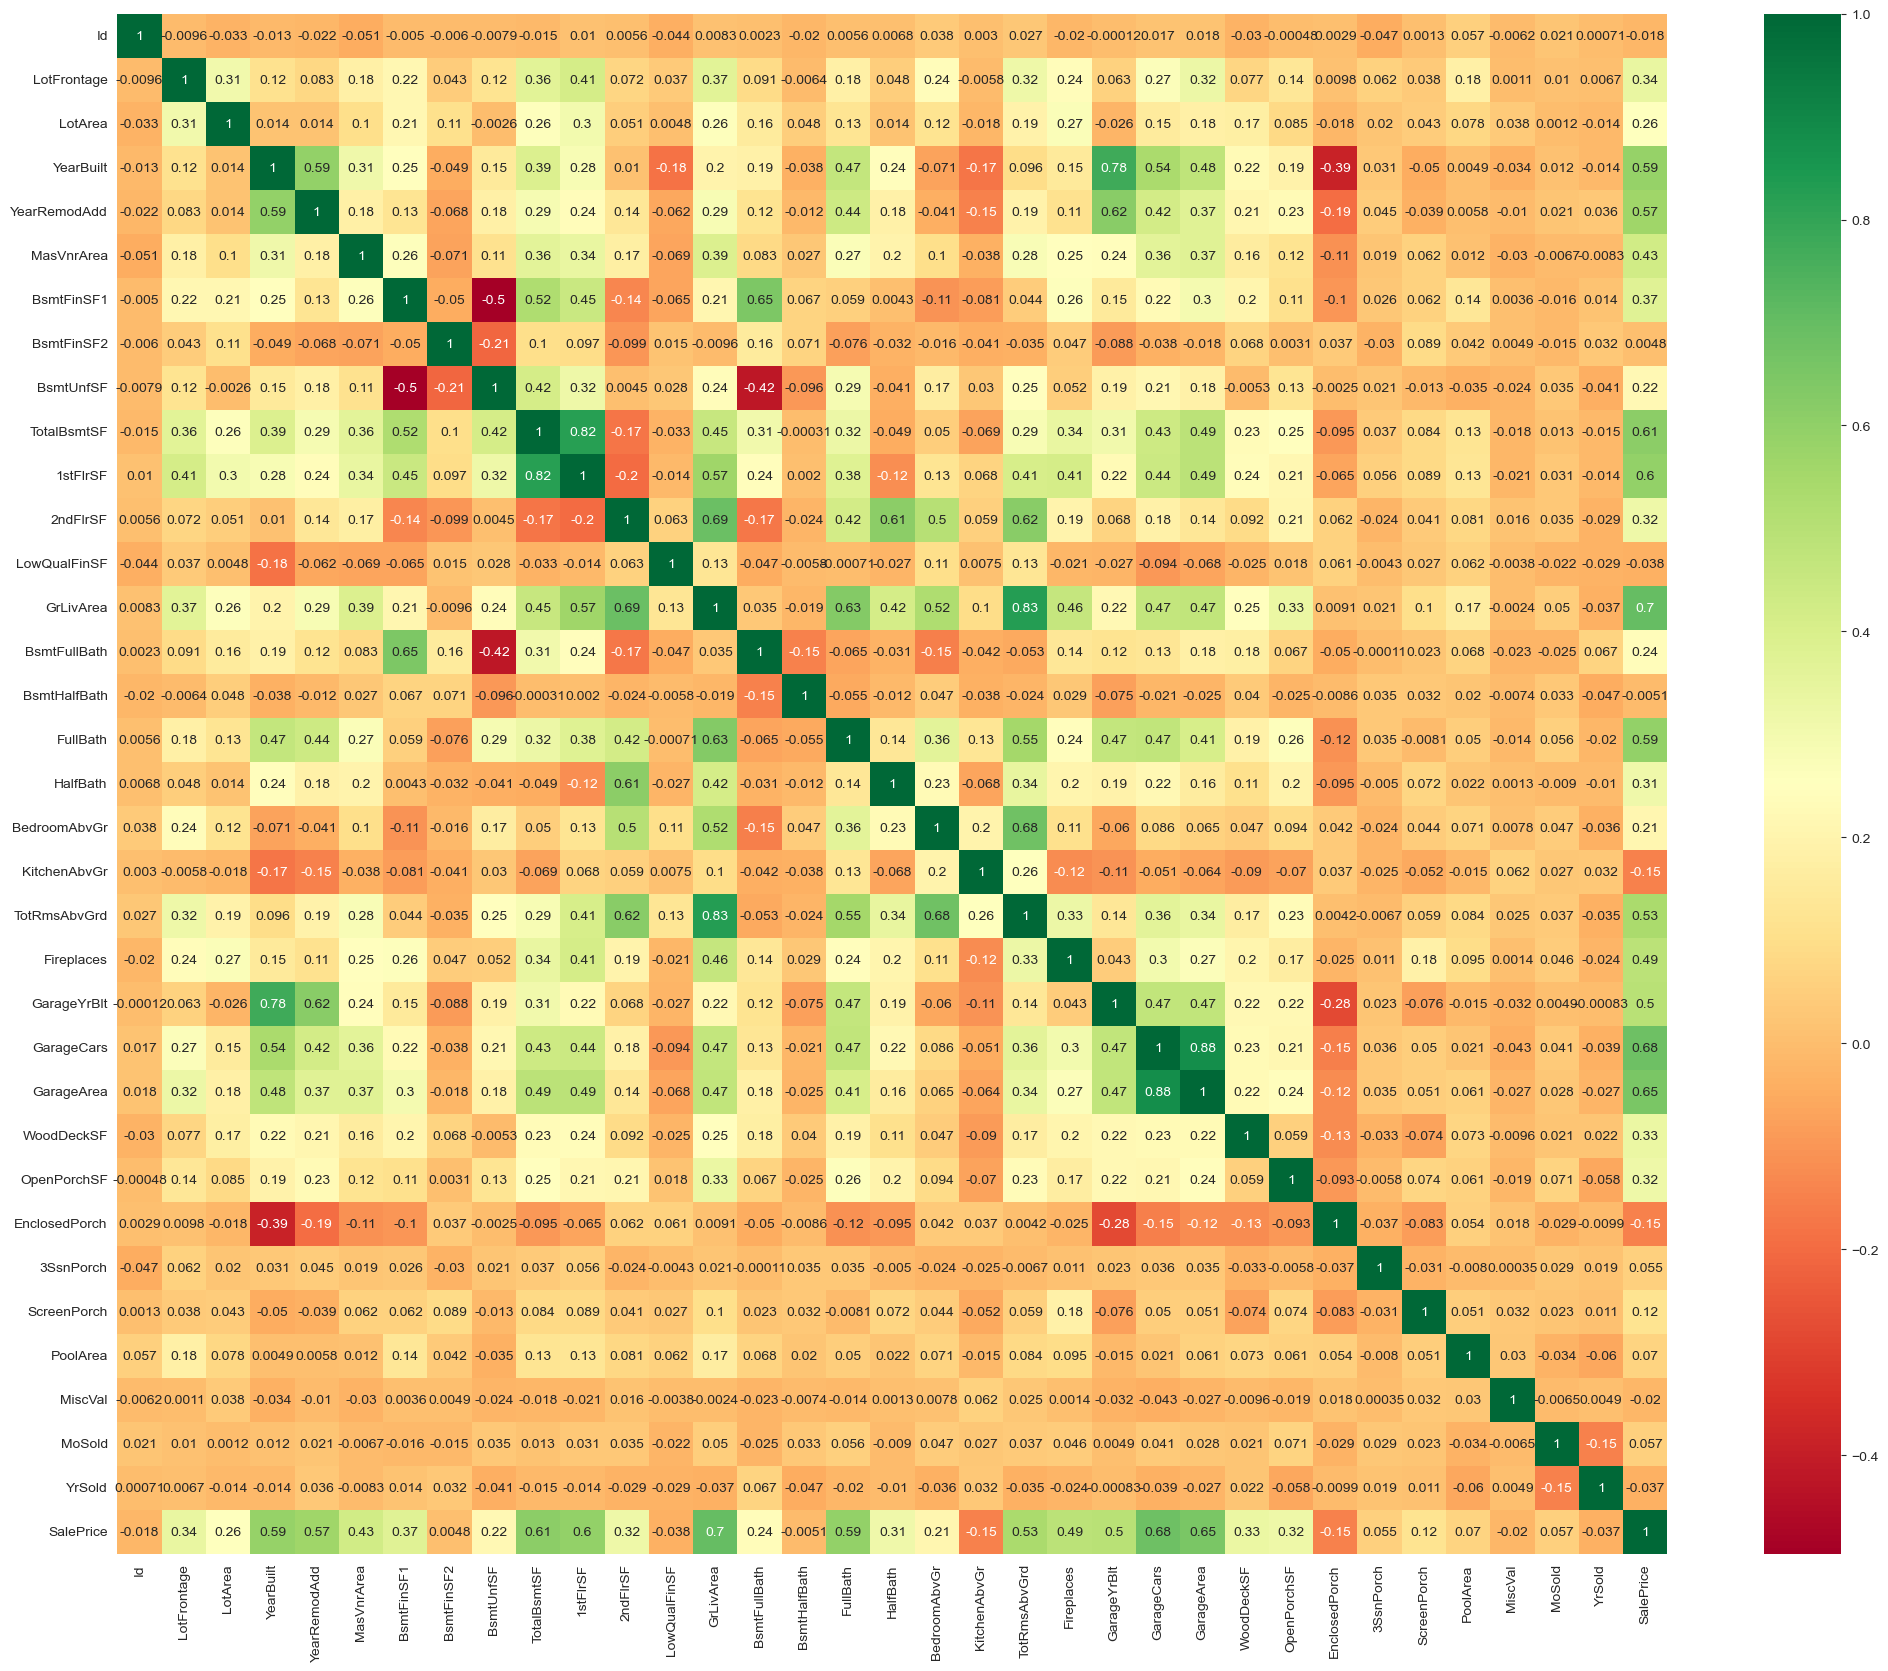

In [476]:
# Let us look at the heat map for correlation

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn');

&#x2139; —  **Note** 
     
📍 Sales price has good correlation with a few variables - GrLivArea, GarageArea, GarageCars, TotalBsmtSf, YearBuilt
    
📍 But there is also correlation between the feature variables as well (multicolinearity).  This will have to be handled.


In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [478]:
df.drop('Id',axis=1, inplace=True)

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

#### Dummy Variable Creation

In [480]:
# Let us create dummy variable for the categorical fields

In [481]:
df_categorical_fields = df.select_dtypes(include=['object'])
df_categorical_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  OverallCond    1460 non-null   object
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [482]:
df_categorical_dummies = pd.get_dummies(df_categorical_fields, drop_first=True)
df_categorical_dummies

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1457,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0

#### Handling Outliers

In [483]:
# We saw outliers when we did EDA earlier.  
# Let us handle them here
df_numerical_variables = df.select_dtypes(include=['int64', 'float64'])
df_numerical_variables.shape

(1460, 34)

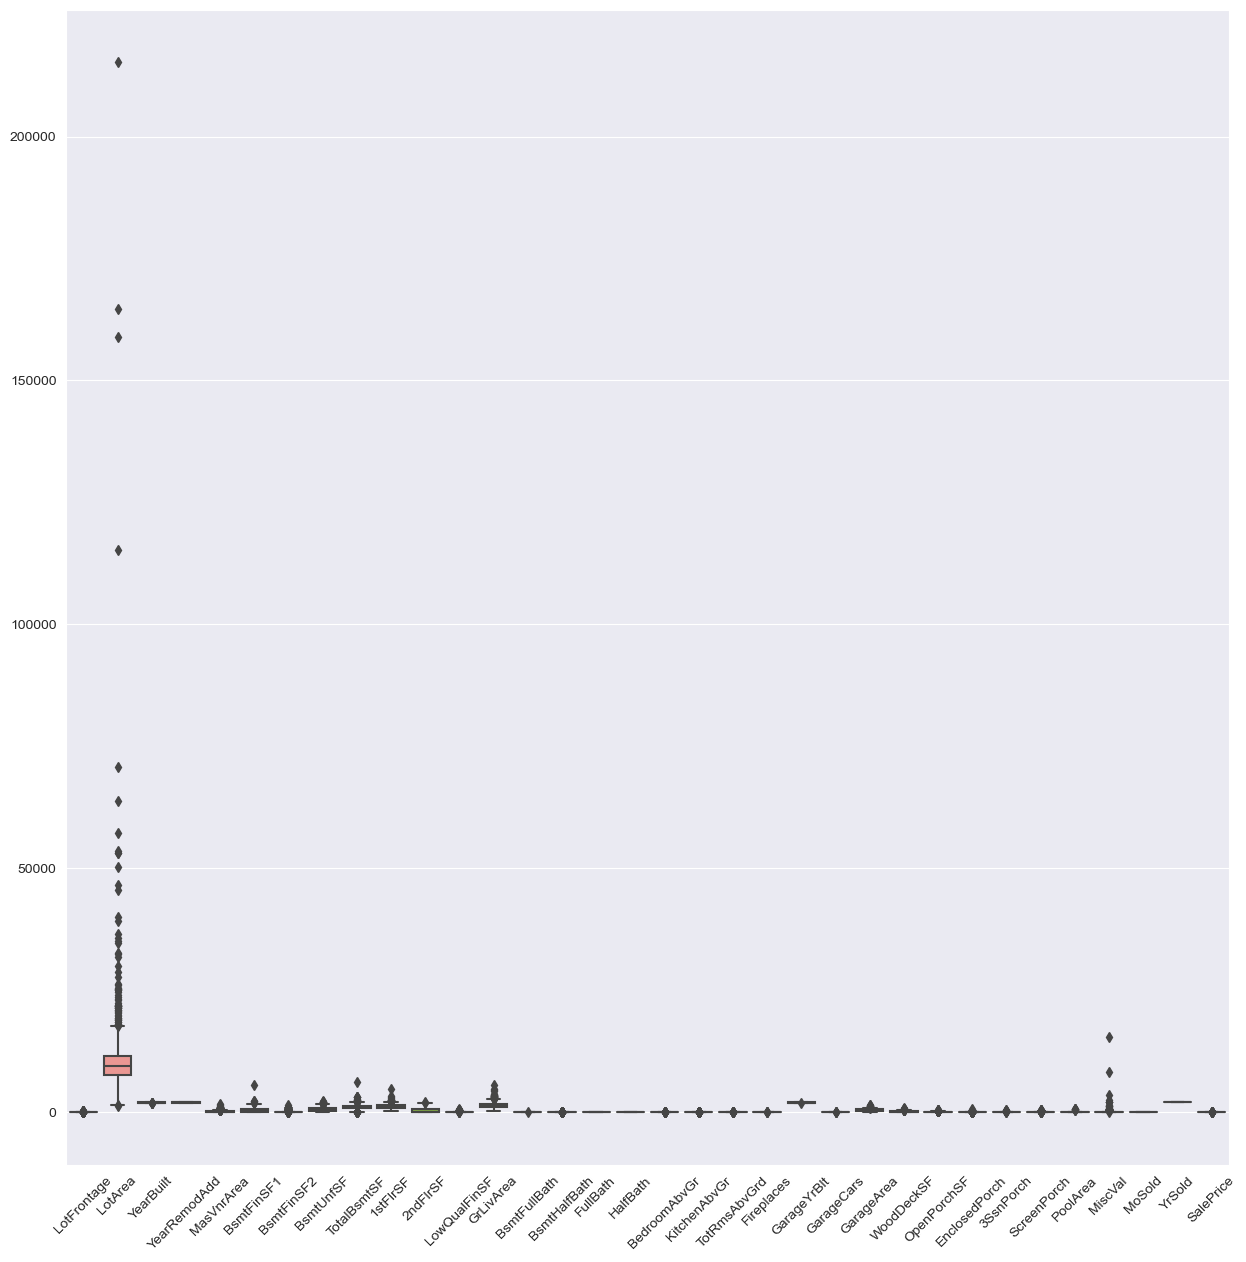

In [484]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=45)
sns.boxplot(data=df_numerical_variables);

In [485]:
# Let us remove all rows that are outsize 95th percentile of the distribution
# df_numerical_variables[(np.abs(stats.zscore(df_numerical_variables)) < 3).all(axis=1)]

In [486]:
# We tried to drop the rows that have at least 1 value that is an outlier for that column
# It drops too many rows (there are only 1037 rows left after dropping)
# So let us cap the values at 5th and 95th percentile respectively.

In [487]:
# Let us cap the values
quantiles = df_numerical_variables.quantile([0.05, 0.95])

df_numerical_variables = df_numerical_variables.apply(
    lambda x: x.clip(quantiles[x.name][0.05], quantiles[x.name][0.95])
)

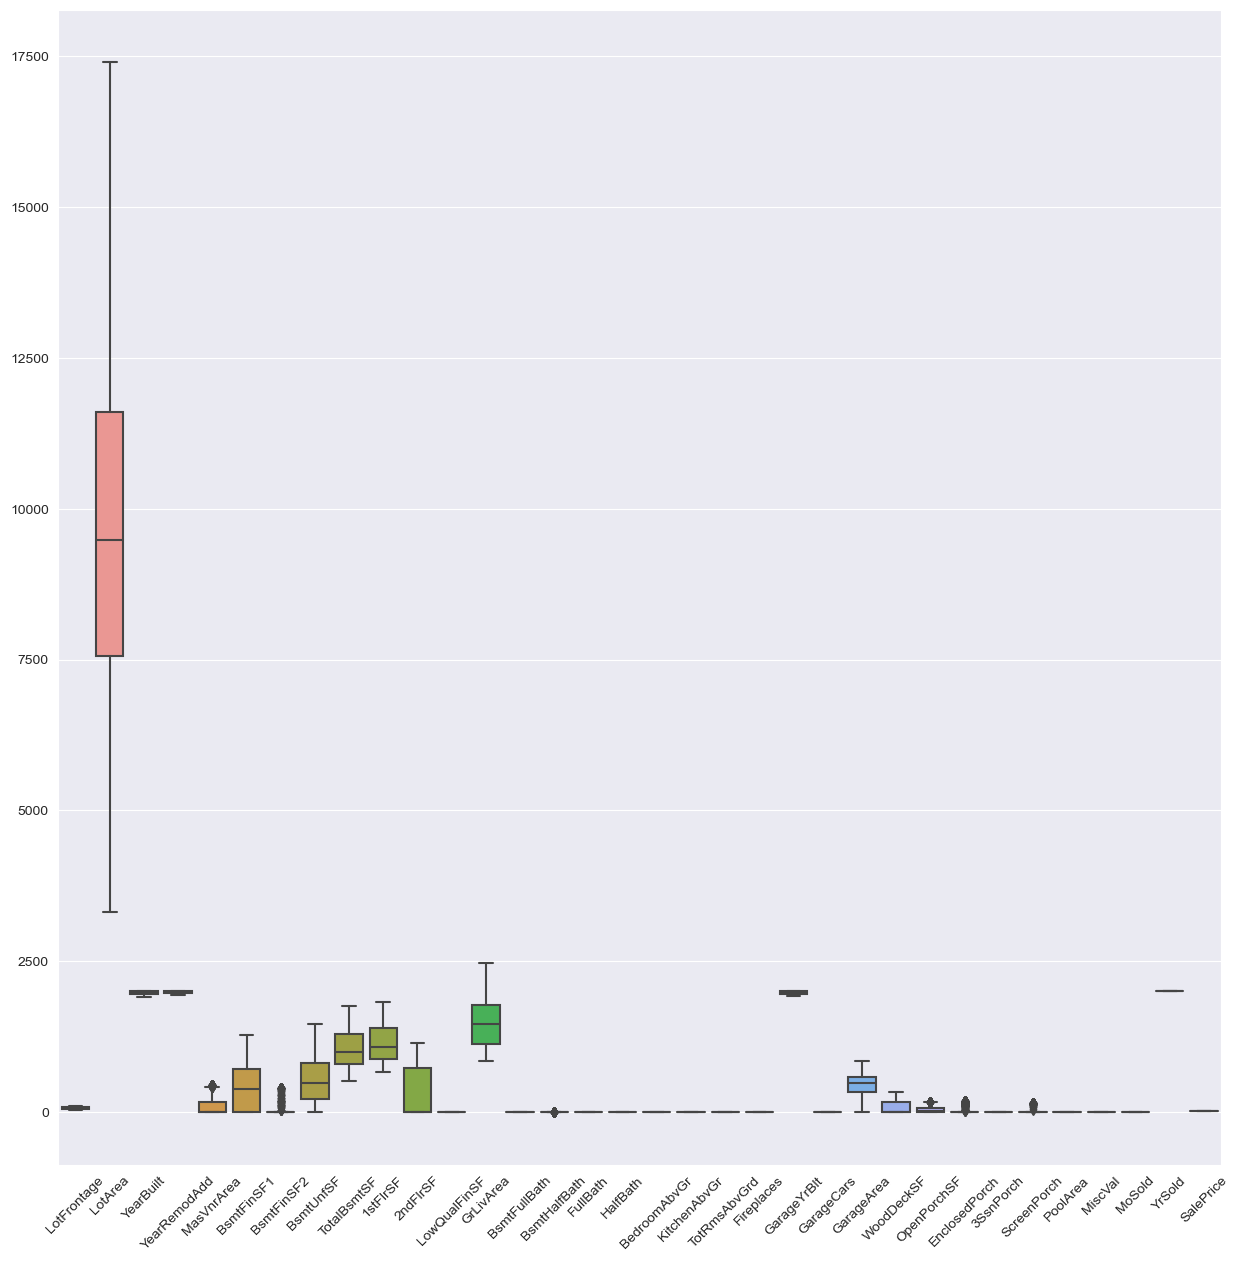

In [488]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=45)
sns.boxplot(data=df_numerical_variables);

&#x2139; —  **Note** 
     
📍 We have removed the outliers now


In [547]:
# Putting together all the fields after outlier handling & dummy variable creation
df = pd.concat([df_numerical_variables, df_categorical_dummies], axis=1)



In [548]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,...,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,2003,2003,196,706,0.0,150,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003,2,548.0,0,61.0,0.00,0,0,0,0,2,2008,12.247694,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,1976,1976,0,978,0.0,284,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976,2,460.0,298,0.0,0.00,0,0,0,0,5,2007,12.109011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,2001,2002,162,486,0.0,434,920.0,920.0,866.0,0,1786.0,1,0,2,1,3,1,6,1,2001,2,608.0,0,42.0,0.00,0,0,0,0,9,2008,12.317167,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,1916,1970,0,216,0.0,540,756.0,961.0,756.0,0,1717.0,1,0,1,0,3,1,7,1,1998,3,642.0,0,35.0,180.15,0,0,0,0,2,2006,11.849398,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,2000,2000,350,655,0.0,490,1145.0,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,9,1,2000,3,836.0,192,84.0,0.00,0,0,0,0,11,2008,12.429216,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Derived Features

In [549]:
# Age of a house is more intutive and easy to interpret than the year built and year sold.
# Let us create a derived variable for age of house

df['Age'] = df['YrSold'] - df['YearBuilt']

# YrSold & YearBuilt are now redundant
df.drop(['YrSold', 'YearBuilt'], axis=1, inplace=True)

### Ridge & Lasso using GridsearchCV

#### Ridge Regression

In [550]:
# Define helper function to calculate some metrices
def calculate_metrices(y_train, y_train_pred, y_test, y_pred):
    metrics_dict = {}

    # R-squared of train and test data
    metrics_dict['R-Squared'] = [r2_score(y_train, y_train_pred), r2_score(y_test, y_pred)]

    # Residual sum of squares of train and test data
    metrics_dict['RSS'] = [np.sum(np.square(y_train - y_train_pred)), np.sum(np.square(y_test - y_pred))]

    # Mean Squared Error of train and test data
    metrics_dict['MSE'] = [mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_pred)]

    # Root Mean Squared Error for train and test data
    metrics_dict['RMSE'] = [np.sqrt(metrics_dict['MSE'][0]), np.sqrt(metrics_dict['MSE'][1])]

    metrics_df = pd.DataFrame(metrics_dict, index=['Train', 'Test']).transpose()
    return metrics_df

In [551]:
# Split the data in to test & train sets

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [552]:
df_train.shape

(1021, 288)

In [553]:
df_test.shape

(439, 288)

In [554]:
norm_scaler = MinMaxScaler()
scalar_vars = list(df_train.select_dtypes(include=['int64', 'float64']).columns)
df_train[scalar_vars] = norm_scaler.fit_transform(df_train[scalar_vars])

In [555]:
df_train.describe()

,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Age
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.0,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.485303,0.449944,0.612454,0.201827,0.340868,0.086960,0.376658,0.437664,0.417370,0.292493,0.0,0.402111,0.426053,0.058766,0.551420,0.369246,0.437806,0.0,0.414953,0.296768,0.639518,0.588965,0.549908,0.261418,0.247510,0.112211,0.0,0.071388,0.0,0.0,0.476766,0.486580,0.100881,0.041136,0.358472,0.064643,0.002938,0.024486,0.009794,0.041136,0.196866,0.045054,0.041136,0.005877,0.014691,0.042116,0.044074,0.012733,0.785504,0.150833,...,0.257591,0.484819,0.012733,0.203722,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156,0.032321,0.008815,0.055828,0.001959,0.900098,0.025465,0.005877,0.055828,0.004897,0.906954,0.020568,0.915769,0.000979,0.000979,0.996082,0.032321,0.104799,0.006856,0.818805,0.961802,0.001959,0.034280,0.0,0.003918,0.001959,0.004897,0.002938,0.003918,0.078355,0.002938,0.870715,0.002938,0.007835,0.013712,0.825661,0.078355,0.383010
std,0.244985,0.245187,0.360033,0.310501,0.324066,0.261811,0.286985,0.286253,0.292365,0.361394,0.0,0.275828,0.494744,0.235301,0.497593,0.482837,0.328843,0.0,0.250334,0.315575,0.296254,0.244887,0.236307,0.325568,0.305368,0.287119,0.0,0.250

In [556]:
# Preparing the X_train & y_train sets

y_train = df_train.pop('SalePrice')
X_train = df_train

In [499]:
print(X_train.shape)
print(y_train.shape)

(1021, 287)
(1021,)


In [557]:
# Doing GridSearchCV with a range of lambda values

params = {'alpha': [0.001, 0.01, 0.05, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 1000.0]}

ridge = Ridge()

# Run the cross-validation
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridge_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.5, 1.0, 5.0, 10.0, 20.0,
                                   50.0, 100.0, 1000.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [558]:
cv_results = pd.DataFrame(ridge_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head(n=20)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010022,0.001462,0.001951,0.000344,0.001,{'alpha': 0.001},-0.091954,-0.102254,-0.101987,-0.086301,-0.082774,-0.093054,0.007962,10,-0.047848,-0.048782,-0.048900,-0.049643,-0.050648,-0.049164,0.000936
1,0.009194,0.000735,0.001693,0.000152,0.01,{'alpha': 0.01},-0.090240,-0.101865,-0.098458,-0.085577,-0.081249,-0.091478,0.007715,8,-0.047876,-0.048786,-0.048950,-0.049650,-0.050664,-0.049185,0.000931
2,0.008572,0.001154,0.001915,0.000432,0.05,{'alpha': 0.05},-0.087570,-0.100529,-0.093840,-0.083554,-0.077182,-0.088535,0.008082,7,-0.048079,-0.048846,-0.049170,-0.049752,-0.050834,-0.049336,0.000923
3,0.006393,0.000593,0.001744,0.001115,0.5,{'alpha': 0.5},-0.081555,-0.095377,-0.088073,-0.077773,-0.070119,-0.082579,0.008641,5,-0.050507,-0.050193,-0.050772,-0.051837,-0.052975,-0.051257,0.001022
4,0.007904,0.003975,0.002218,0.001934,1.0,{'alpha': 1.0},-0.079049,-0.093696,-0.086320,-0.075864,-0.069467,-0.080879,0.008398,4,-0.052493,-0.051418,-0.052156,-0.053671,-0.054690,-0.052886,0.001159
5,0.005931,0.001381,0.001338,0.000507,5.0,{'alpha': 5.0},-0.074236,-0.090880,-0.083748,-0.071556,-0.071302,-0.078345,0.007732,1,-0.059214,-0.056380,-0.057717,-0.060074,-0.060502,-0.058777,0.001531
6,0.007083,0.002056,0.001568,0.000569,10.0,{'alpha': 10.0},-0.073833,-0.090809,-0.083965,-0.070637,-0.073510,-0.078551,0.007614,2,-0.063172,-0.059892,-0.061394,-0.063982,-0.063974,-0.062483,0.001603
7,0.006764,0.002012,0.001083,0.000079,20.0,{'alpha': 20.0},-0.075278,-0.092156,-0.085192,-0.071533,-0.076833,-0.080199,0.007464,3,-0.068299,-0.064767,-0.066326,-0.069127,-0.068614,-0.067427,0.001634
8,0.007123,0.002805,0.001513,0.000980,50.0,{'alpha': 50.0},-0.080939,-0.097002,-0.088975,-0.077192,-0.083650,-0.085552,0.006894,6,-0.077636,-0.074017,-0.075656,-0.078517,-0.077470,-0.076659,0.001616
9,0.007912,0.002144,0.001076,0.000072,100.0,{'alpha': 100.0},-0.088639,-0.103496,-0.094424,-0.085348,-0.091462,-0.092674,0.006190,9,-0.087172,-0.083655,-0.085424,-0.087974,-0.086838,-0.086213,0.001522


In [559]:
ridge_cv.best_params_

{'alpha': 5.0}

&#x2139; —  **Note** 
     
📍 Looks like the alpha value of 5.0 gives the best results.


In [561]:
# Let us build a ridge regression model with alpha of 5.0
final_ridge_model = Ridge(alpha=5.0)

In [562]:
final_ridge_model.fit(X_train, y_train)

Ridge(alpha=5.0)

In [563]:
y_train_pred = final_ridge_model.predict(X_train)

In [564]:
# To get the predictions for the test set, we have to first scale the values
df_test[scalar_vars] = norm_scaler.transform(df_test[scalar_vars])

# Now that we have scaled, let us remove the predictor variables from the dependent variable
y_test = df_test.pop('SalePrice')
X_test = df_test

In [565]:
y_pred = final_ridge_model.predict(X_test)

In [566]:
# Let us calculate some metrices for the train & test set.
# These are for the ridge model with alpha of 5.0
ridge_model_metrics=calculate_metrices(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_pred=y_pred)
ridge_model_metrics

,Train,Test
R-Squared,0.950334,0.897166
RSS,3.687522,3.245552
MSE,0.003612,0.007393
RMSE,0.060097,0.085983


&#x2139; —  **Note** 
     
📍 The RMSE for Train & Test sets are very close to each other.  <br>
📍 The R-Squared for Train & Test sets are very close to each other.  


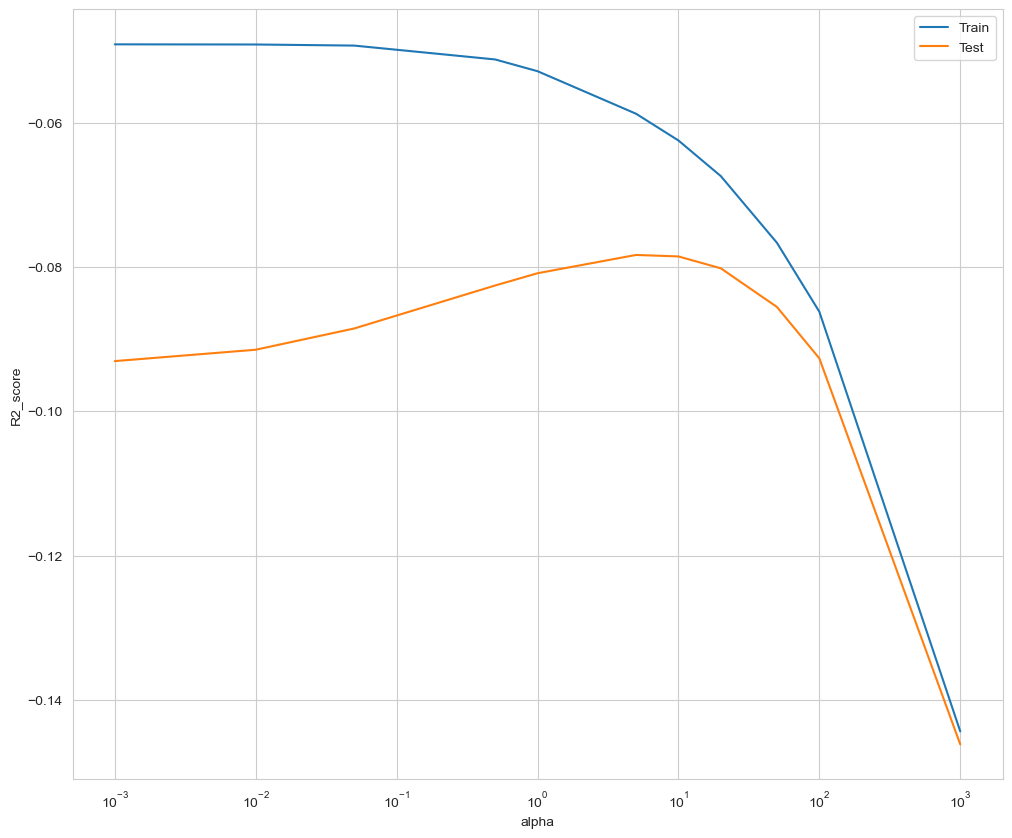

In [567]:
plt.figure(figsize = (12, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'], label='Train')
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

&#x2139; —  **Observations** 
     
#### 📍 Larger values of alpha give a better train & test error.


Error distribution in test dataset


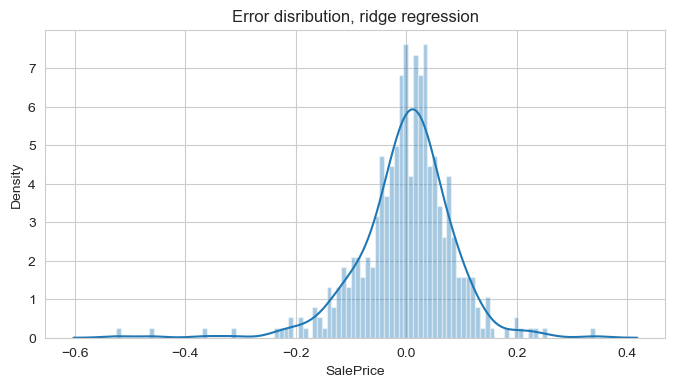

In [568]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
sns.distplot((y_test - y_pred), bins = 100)
plt.title('Error disribution, ridge regression')



plt.subplots_adjust(wspace = .5)

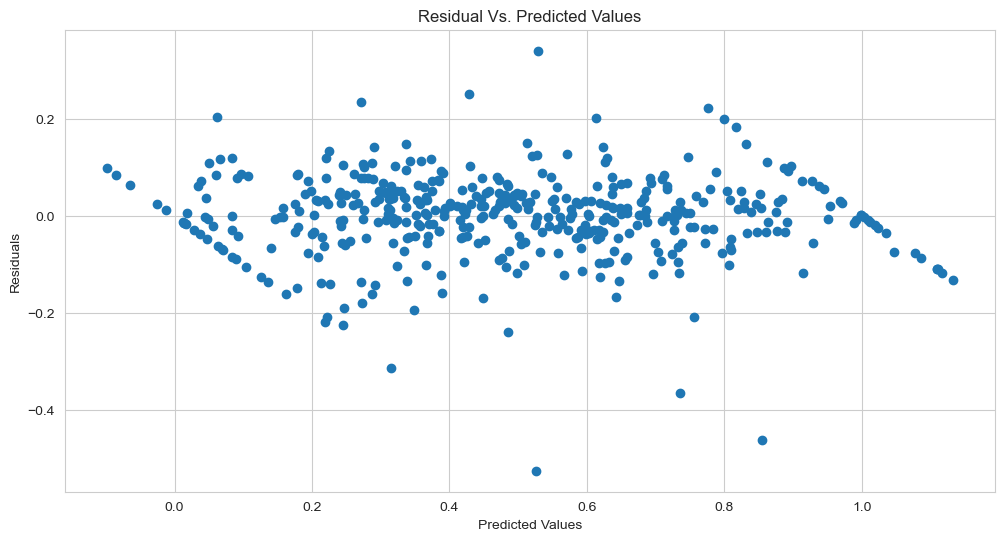

In [569]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
plt.scatter(y_pred, (y_test - y_pred))
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

&#x2139; —  **Note** 
     
📍 The residuals are centered around zero   
📍 There is no visible pattern in the resuiduals



#### Lasso Regression

In [570]:
# Doing GridSearchCV with a range of lambda values

params = {'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.5, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0]}

lasso_lv = Lasso()

# Run the cross-validation
lasso_cv = GridSearchCV(estimator = lasso_lv, 
                        param_grid = params, 
                        scoring= 'neg_root_mean_squared_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.01, 0.05, 0.5, 1.0,
                                   5.0, 10.0, 20.0, 50.0, 100.0]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [571]:
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051982,0.003863,0.001527,0.000134,0.0001,{'alpha': 0.0001},-0.074640,-0.090874,-0.080873,-0.073491,-0.064245,-0.076825,0.008808,2,-0.052451,-0.052557,-0.053222,-0.053295,-0.054476,-0.053200,0.000723
1,0.026363,0.005334,0.003415,0.001108,0.0005,{'alpha': 0.0005},-0.070692,-0.087990,-0.079614,-0.072286,-0.067993,-0.075715,0.007246,1,-0.066397,-0.062775,-0.063965,-0.065803,-0.066982,-0.065184,0.001573
2,0.016618,0.002746,0.001883,0.001051,0.001,{'alpha': 0.001},-0.073638,-0.091813,-0.083128,-0.074805,-0.073070,-0.079291,0.007243,3,-0.072891,-0.069256,-0.070901,-0.072842,-0.073703,-0.071918,0.001619
3,0.008146,0.001071,0.001724,0.000689,0.01,{'alpha': 0.01},-0.109688,-0.118924,-0.111464,-0.111935,-0.114362,-0.113275,0.003195,4,-0.113027,-0.109038,-0.110502,-0.111502,-0.111547,-0.111123,0.001318
4,0.005614,0.002195,0.001221,0.000471,0.05,{'alpha': 0.05},-0.217190,-0.219786,-0.209917,-0.207947,-0.221163,-0.215200,0.005312,5,-0.213975,-0.212978,-0.215214,-0.214939,-0.214870,-0.214395,0.000822
5,0.003729,0.001819,0.000964,0.000063,0.5,{'alpha': 0.5},-0.272632,-0.273597,-0.263069,-0.264520,-0.276040,-0.269971,0.005185,6,-0.268973,-0.268711,-0.271288,-0.271028,-0.268115,-0.269623,0.001286
6,0.004914,0.002076,0.001089,0.000170,1.0,{'alpha': 1.0},-0.272632,-0.273597,-0.263069,-0.264520,-0.276040,-0.269971,0.005185,6,-0.268973,-0.268711,-0.271288,-0.271028,-0.268115,-0.269623,0.001286
7,0.003795,0.000864,0.001087,0.000249,5.0,{'alpha': 5.0},-0.272632,-0.273597,-0.263069,-0.264520,-0.276040,-0.269971,0.005185,6,-0.268973,-0.268711,-0.271288,-0.271028,-0.268115,-0.269623,0.001286
8,0.004863,0.002255,0.001516,0.000779,10.0,{'alpha': 10.0},-0.272632,-0.273597,-0.263069,-0.264520,-0.276040,-0.269971,0.005185,6,-0.268973,-0.268711,-0.271288,-0.271028,-0.268115,-0.269623,0.001286
9,0.003329,0.000452,0.001004,0.000104,20.0,{'alpha': 20.0},-0.272632,-0.273597,-0.263069,-0.264520,-0.276040,-0.269971,0.005185,6,-0.268973,-0.268711,-0.271288,-0.271028,-0.268115,-0.269623,0.001286


In [572]:
lasso_cv.best_params_

{'alpha': 0.0005}

&#x2139; —  **Note** 
     
📍 Looks like the alpha value of 0.0005 gives the best results.


In [573]:
# Let us build a lasso regression model with alpha of 0.0005
final_lasso_model = Lasso(alpha=0.0005)

In [574]:
final_lasso_model.fit(X_train, y_train)

Lasso(alpha=0.0005)

In [575]:
# Predict the values for training set
y_train_pred = final_lasso_model.predict(X_train)

In [576]:
# We have the X_test & y_test already
# Predict the values for test set.
y_pred = final_lasso_model.predict(X_test)


# Let us calculate some metrices for the train & test set.
# These are for the lasso model with alpha of 0.005
lasso_model_metrics=calculate_metrices(y_train=y_train, y_train_pred=y_train_pred, y_test=y_test, y_pred=y_pred)
lasso_model_metrics

,Train,Test
R-Squared,0.937800,0.896685
RSS,4.618167,3.260727
MSE,0.004523,0.007428
RMSE,0.067255,0.086184


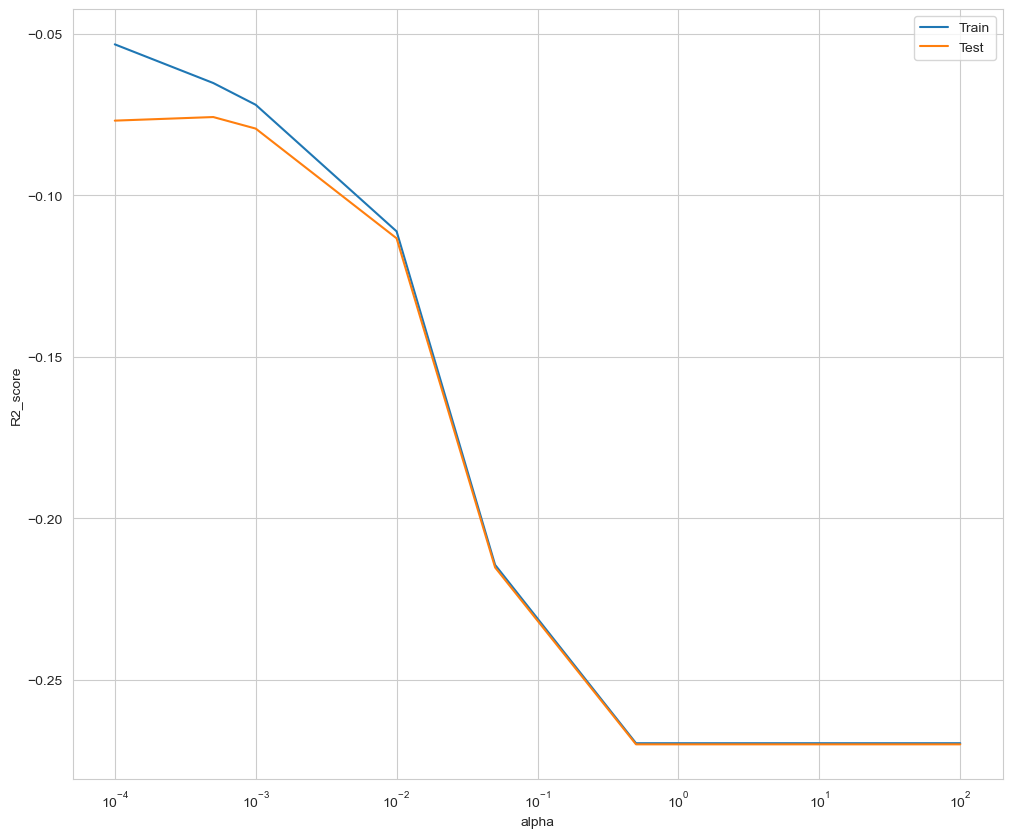

In [577]:
plt.figure(figsize = (12, 10))
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'], label='Train')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xscale('log')
plt.legend()
plt.show()

Error distribution in test dataset


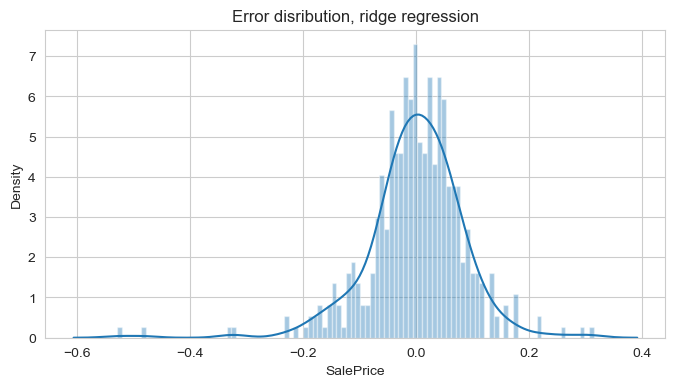

In [578]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
sns.distplot((y_test - y_pred), bins = 100)
plt.title('Error disribution, ridge regression')


plt.subplots_adjust(wspace = .5)

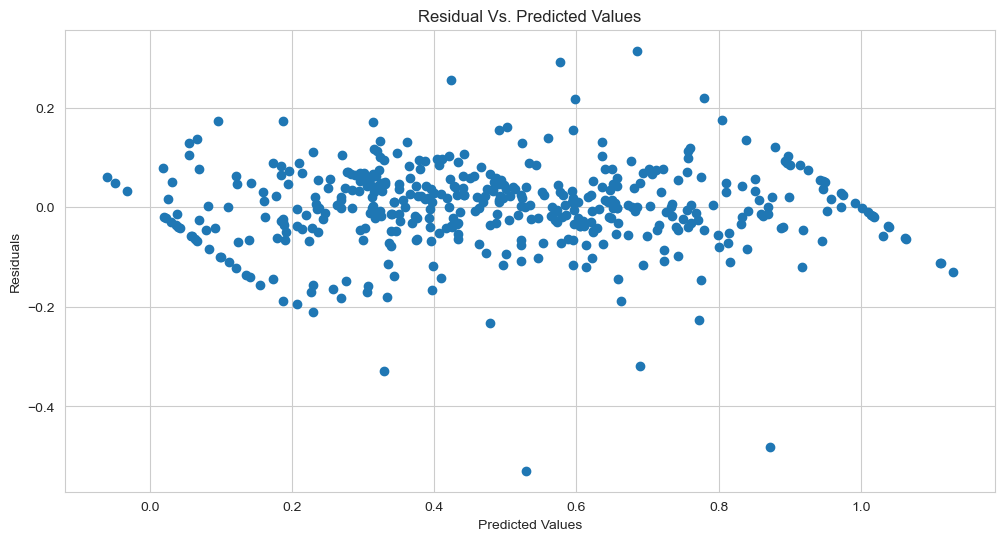

In [579]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
plt.scatter(y_pred, (y_test - y_pred))
plt.title('Residual Vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

&#x2139; —  **Note** 
     
📍 The residuals are centered around zero   
📍 There is no visible pattern in the resuiduals



In [623]:
# Model Metrics for Lasso
lasso_model_metrics

,Train,Test
R-Squared,0.94,0.90
RSS,4.62,3.26
MSE,0.00,0.01
RMSE,0.07,0.09


In [624]:
# Model Metrics for Ridge
ridge_model_metrics

,Train,Test
R-Squared,0.95,0.90
RSS,3.69,3.25
MSE,0.00,0.01
RMSE,0.06,0.09


&#x2139; **Observations** 
     
📍 The ridge and lasso methods give good r-squared values in train and test   
📍 The r-squared values are also similar.  0.90 for both ridge and lasso.  
📍 The models are not overfitting and the assumptions of linear regression hold for the predictions.    



In [611]:
pd.options.display.float_format = "{:,.2f}".format
ridge_beta_coeffs = pd.DataFrame(final_ridge_model.coef_, columns=['Beta Coefficients'], index=X_train.columns)
ridge_beta_coeffs.loc['Intercept'] = final_ridge_model.intercept_  # Include intercept if needed
print(ridge_beta_coeffs.sort_values(by='Beta Coefficients',ascending=False).head(n=20))



                       Beta Coefficients
GrLivArea                           0.15
TotalBsmtSF                         0.11
OverallQual_Excellent               0.09
OverallQual_Very Good               0.08
2ndFlrSF                            0.08
Neighborhood_Crawfor                0.07
OverallCond_Excellent               0.07
LotArea                             0.07
1stFlrSF                            0.07
GarageArea                          0.06
YearRemodAdd                        0.06
Neighborhood_StoneBr                0.05
SaleType_ConLD                      0.05
Condition2_PosA                     0.05
Functional_Typ                      0.05
Exterior1st_BrkFace                 0.05
Neighborhood_Somerst                0.04
Neighborhood_ClearCr                0.04
BsmtFinSF1                          0.04
GarageQual_Gd                       0.04


In [612]:
print(ridge_beta_coeffs.sort_values(by='Beta Coefficients',ascending=True).head(n=20))


                                                    Beta Coefficients
PoolQC_Gd                                                       -0.08
Age                                                             -0.08
Condition2_PosN                                                 -0.06
Neighborhood_MeadowV                                            -0.06
OverallCond_Fair                                                -0.05
Intercept                                                       -0.05
Neighborhood_Edwards                                            -0.05
GarageQual_Fa                                                   -0.04
GarageType_CarPort                                              -0.04
Functional_Maj2                                                 -0.04
OverallCond_Below Average                                       -0.04
MSSubClass_2-STORY PUD - 1946 & NEWER                           -0.04
OverallCond_Poor                                                -0.04
OverallQual_Fair    

In [620]:
important_coeffs_ridge = ridge_beta_coeffs.copy()                                         # Create a copy of coefficients DataFrame
important_coeffs_ridge['Absolute'] = important_coeffs_ridge['Beta Coefficients'].abs()    # Add a column for absolute values
important_coeffs_ridge = important_coeffs_ridge.nlargest(12, 'Absolute')                  # Select top '12' based on absolute values

print(important_coeffs) 

                       Beta Coefficients  Absolute
GrLivArea                           0.15      0.15
TotalBsmtSF                         0.11      0.11
OverallQual_Excellent               0.09      0.09
OverallQual_Very Good               0.08      0.08
2ndFlrSF                            0.08      0.08
PoolQC_Gd                          -0.08      0.08
Age                                -0.08      0.08
Neighborhood_Crawfor                0.07      0.07
OverallCond_Excellent               0.07      0.07
LotArea                             0.07      0.07
1stFlrSF                            0.07      0.07
GarageArea                          0.06      0.06


In [ ]:
# Doing the same for lasso

lasso_beta_coeffs = pd.DataFrame(final_lasso_model.coef_, columns=['Beta Coefficients'], index=X_train.columns)
lasso_beta_coeffs.loc['Intercept'] = final_lasso_model.intercept_  # Include intercept if needed
print(lasso_beta_coeffs.sort_values(by='Beta Coefficients',ascending=False).head(n=20))

In [622]:
important_coeffs_lasso = lasso_beta_coeffs.copy()                                         # Create a copy of coefficients DataFrame
important_coeffs_lasso['Absolute'] = important_coeffs_lasso['Beta Coefficients'].abs()    # Add a column for absolute values
important_coeffs_lasso = important_coeffs_lasso.nlargest(12, 'Absolute')                  # Select top '12' based on absolute values

print(important_coeffs_lasso) 

                       Beta Coefficients  Absolute
GrLivArea                           0.29      0.29
OverallQual_Excellent               0.13      0.13
TotalBsmtSF                         0.13      0.13
Age                                -0.10      0.10
OverallQual_Very Good               0.10      0.10
Neighborhood_Crawfor                0.08      0.08
GarageArea                          0.07      0.07
YearRemodAdd                        0.06      0.06
OverallCond_Excellent               0.06      0.06
LotArea                             0.06      0.06
Neighborhood_Somerst                0.06      0.06
Neighborhood_MeadowV               -0.05      0.05
